### Implementation of Classification Model

In this notebook we go implement different models to classification to determine whether mushrooms are edible, it is necessary to collect mushrooms with different characteristic attributes and analyze whether they are toxic in the mushroom dataset.

Like we saw in the analysis notebook, it is suggested to implement complex models, therefore we are gone to implement random forest, gradient boost and neuronal networks and analyzing which is better to solve this problem.

#### Import and Adjust Data

In [1]:
# Libraries to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
mushroom_dataset = pd.read_csv('../assets/data/mushroom.csv')
mushroom_dataset = mushroom_dataset.drop(columns=['stalk-root'])
mushroom_dataset.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

mushroom_dataset = pd.DataFrame(imputer.fit_transform(mushroom_dataset), columns=mushroom_dataset.columns)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mushroom_dataset_encoded = mushroom_dataset.apply(label_encoder.fit_transform)


X = mushroom_dataset_encoded.drop(columns=['class'])
y = mushroom_dataset_encoded['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Note**: As we saw in the frequency analysis in the 'Stalk-root' have many values of ?, therefore, we will not tend this column to implement the models. 


#### Random Forest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
y_pred_RF = classifier_RF.predict(X_test)

Accuracy of Random Forest Classifier:  0.7266430660304756


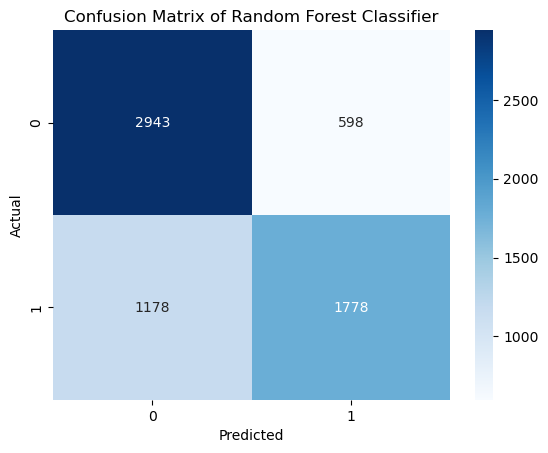

Classification Report of Random Forest Classifier: 
              precision    recall  f1-score   support

      Edible       0.71      0.83      0.77      3541
   Poisonous       0.75      0.60      0.67      2956

    accuracy                           0.73      6497
   macro avg       0.73      0.72      0.72      6497
weighted avg       0.73      0.73      0.72      6497



In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print('Accuracy of Random Forest Classifier: ', accuracy_RF)

confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(confusion_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

classification_report_RF = classification_report(y_test, y_pred_RF, target_names=['Edible', 'Poisonous'])
print(f'Classification Report of Random Forest Classifier: \n{classification_report_RF}')

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Define parameter grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create score to optimize the poison class
recall_score = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV
grid_search_RF = GridSearchCV(estimator=classifier_RF, param_grid=param_grid, scoring=recall_score, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_RF.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search_RF.best_params_}')

# Best estimator
best_rf_model = grid_search_RF.best_estimator_


Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


Tuned Model Accuracy: 0.73


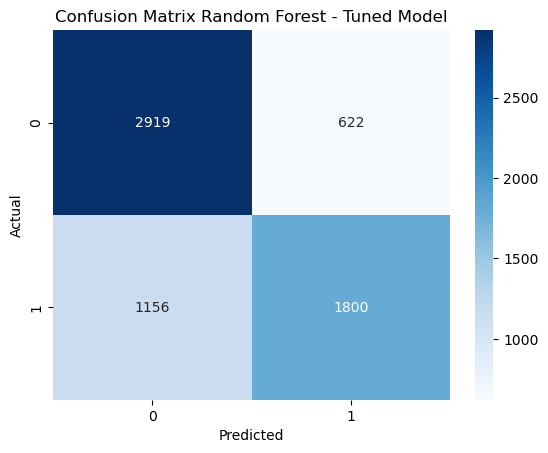

Classification Report Random Forest - Tuned Model:
              precision    recall  f1-score   support

      Edible       0.72      0.82      0.77      3541
   Poisonous       0.74      0.61      0.67      2956

    accuracy                           0.73      6497
   macro avg       0.73      0.72      0.72      6497
weighted avg       0.73      0.73      0.72      6497



In [16]:
# Make predictions with the best model
best_y_pred_RF = best_rf_model.predict(X_test)

# Calculate accuracy
best_accuracy_RF = accuracy_score(y_test, best_y_pred_RF)
print(f'Tuned Model Accuracy: {best_accuracy_RF:.2f}')

# Generate a confusion matrix
best_conf_matrix_RF = confusion_matrix(y_test, best_y_pred_RF)
sns.heatmap(best_conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
best_class_report_RF = classification_report(y_test, best_y_pred_RF, target_names=['Edible', 'Poisonous'])
print('Classification Report Random Forest - Tuned Model:')
print(best_class_report_RF)


1. **Class Imbalance**:
    
    The recall for the poisonous class (0.61) is significantly lower than that of the edible class (0.82). This indicates that the model is less effective at identifying all the poisonous mushrooms, which is a critical issue given the potential risks associated with misclassifying poisonous mushrooms as edible.

2. **Precision vs. Recall**:

    The precision for both classes is relatively balanced (0.72 for edible and 0.74 for poisonous). However, the lower recall for the poisonous class suggests that the model might benefit from adjustments to better capture poisonous mushrooms.

3. **Overall Model Performance**:

    An accuracy of 0.73 is reasonable but leaves room for improvement. Enhancing the model's ability to identify poisonous mushrooms should be a priority.

#### Gradient Boost

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GB = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier_GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [18]:
y_pred_GB = classifier_GB.predict(X_test)

Accuracy of Random Forest Classifier:  0.734338925657996


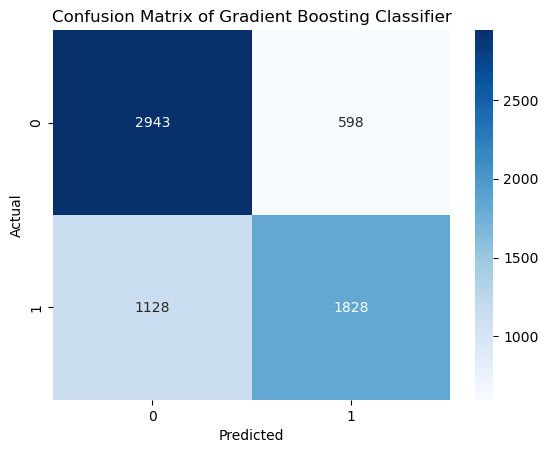

Classification Report of Gradient Boosting Classifier: 
              precision    recall  f1-score   support

      Edible       0.72      0.83      0.77      3541
   Poisonous       0.75      0.62      0.68      2956

    accuracy                           0.73      6497
   macro avg       0.74      0.72      0.73      6497
weighted avg       0.74      0.73      0.73      6497



In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_GB = accuracy_score(y_test, y_pred_GB)
print('Accuracy of Random Forest Classifier: ', accuracy_GB)

confusion_matrix_GB = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(confusion_matrix_GB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

classification_report_GB = classification_report(y_test, y_pred_GB, target_names=['Edible', 'Poisonous'])
print(f'Classification Report of Gradient Boosting Classifier: \n{classification_report_GB}')

In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.05, 0.15, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create score to optimize the poison class
recall_score = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV
grid_search_GB = GridSearchCV(estimator=classifier_GB, param_grid=param_grid, scoring=recall_score, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_GB.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search_GB.best_params_}')

# Best estimator
best_gb_model = grid_search_GB.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


Tuned Model Accuracy: 0.73


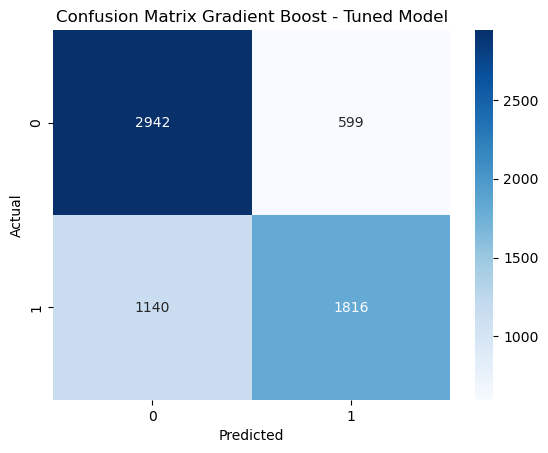

Classification Report Gradient Boost - Tuned Model:
              precision    recall  f1-score   support

      Edible       0.72      0.83      0.77      3541
   Poisonous       0.75      0.61      0.68      2956

    accuracy                           0.73      6497
   macro avg       0.74      0.72      0.72      6497
weighted avg       0.73      0.73      0.73      6497



In [21]:
# Make predictions with the best model
best_y_pred_GB = best_gb_model.predict(X_test)

# Calculate accuracy
best_accuracy_GB = accuracy_score(y_test, best_y_pred_GB)
print(f'Tuned Model Accuracy: {best_accuracy_GB:.2f}')

# Generate a confusion matrix
best_conf_matrix_GB = confusion_matrix(y_test, best_y_pred_GB)
sns.heatmap(best_conf_matrix_GB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Gradient Boost - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
best_class_report_GB = classification_report(
    y_test, best_y_pred_GB, target_names=['Edible', 'Poisonous'])
print('Classification Report Gradient Boost - Tuned Model:')
print(best_class_report_GB)

#### Neuronal Network

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
def create_model_NN(optimizer='adam', activation='relu', dropout=0.5, neurons_1=128):
    neuronal_model = Sequential()
    neuronal_model.add(Input(shape=(X_scaled.shape[1],)))
    neuronal_model.add(Dense(neurons_1, activation='relu'))
    neuronal_model.add(Dropout(rate=dropout))
    neuronal_model.add(Dense(neurons_1//2, activation='relu'))
    neuronal_model.add(Dropout(rate=dropout))
    neuronal_model.add(Dense(2, activation='softmax'))
    neuronal_model.compile(
        optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return neuronal_model

In [ ]:
neuronal_model = create_model_NN(optimizer='adam', activation='relu', dropout=0.2, neurons_1=128)
history_NN = neuronal_model.fit(X_train, y_train_cat, batch_size=32, epochs=100, validation_data=(X_test, y_test_cat))

In [ ]:
loss, accuracy_NN = neuronal_model.evaluate(X_test, y_test_cat)
print(f'Accuracy of Neural Network: {accuracy_NN:.4f}')

In [ ]:
y_pred_NN = neuronal_model.predict(X_test)
y_pred_classes_NN = np.argmax(y_pred_NN, axis=1)
y_test_classes_NN = np.argmax(y_test_cat, axis=1)

In [ ]:
classification_report_NN = classification_report(y_test_classes_NN, y_pred_classes_NN, target_names=['Edible', 'Poisonous'], output_dict=True)

#### Compare Models

In [ ]:
def extract_metrics(report):
    metrics = {
        'precision': [report['Edible']['precision'], report['Poisonous']['precision'], report['macro avg']['precision']],
        'recall': [report['Edible']['recall'], report['Poisonous']['recall'], report['macro avg']['recall']],
        'f1-score': [report['Edible']['f1-score'], report['Poisonous']['f1-score'], report['macro avg']['f1-score']],
        'support': [report['Edible']['support'], report['Poisonous']['support'], report['macro avg']['support']]
    }
    return pd.DataFrame(metrics, index=['Edible', 'Poisonous', 'Macro Avg'])

# Extract metrics from each report
rf_metrics = extract_metrics(best_class_report_RF)
gb_metrics = extract_metrics(best_class_report_GB)
nn_metrics = extract_metrics(classification_report_NN)

# Combine metrics into a single DataFrame
metrics_df = pd.concat([rf_metrics, gb_metrics, nn_metrics], keys=['Random Forest', 'Gradient Boosting', 'Neural Network'])

# Print the combined metrics DataFrame
print(metrics_df)